<a href="https://colab.research.google.com/github/keilabcs/IN1024-2020-1-UFPE/blob/main/Keila_Barbosa_0_Convers%C3%A3o_Para_Halftone_(Meio_tom).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Universidade Federal de Pernambuco Centro de Informática - Cin
Programa de Pós-Graduação
IN1024 - Processamento de Imagens
Keila Barbosa Costa dos Santos

###Exercicio N 0

Dado uma imagem qualquer em escala de cinzar, converta ela para Halftone.

Para essa atividade, podem utilizar qualquer biblioteca em python que for conveniente ( numpy/opencv/sklearn/...)


In [ ]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Read Image
!wget "https://drive.google.com/drive/u/2/folders/10mGdZNNPv4DXvfOt-6V3LDH71Xp779SH"

--2020-08-29 23:05:49--  https://drive.google.com/drive/u/2/folders/10mGdZNNPv4DXvfOt-6V3LDH71Xp779SH
Resolving drive.google.com (drive.google.com)... 172.217.204.113, 172.217.204.139, 172.217.204.102, ...
Connecting to drive.google.com (drive.google.com)|172.217.204.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://drive.google.com/drive/folders/10mGdZNNPv4DXvfOt-6V3LDH71Xp779SH [following]
--2020-08-29 23:05:49--  https://drive.google.com/drive/folders/10mGdZNNPv4DXvfOt-6V3LDH71Xp779SH
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://accounts.google.com/ServiceLogin?service=wise&passive=1209600&continue=https://drive.google.com/drive/folders/10mGdZNNPv4DXvfOt-6V3LDH71Xp779SH&followup=https://drive.google.com/drive/folders/10mGdZNNPv4DXvfOt-6V3LDH71Xp779SH [following]
--2020-08-29 23:05:49--  https://accounts.google.com/ServiceLogin?service=wise&passive=1209600&continue=htt

In [ ]:
#Download Images
from google.colab import files
pbfile = files.upload()

Saving 2ee5J.jpg to 2ee5J.jpg


In [ ]:
!ls -la

total 728
drwxr-xr-x 1 root root   4096 Aug 30 20:17 .
drwxr-xr-x 1 root root   4096 Aug 30 18:27 ..
-rw-r--r-- 1 root root  51566 Aug 30 16:49 2ee5J.jpg
drwxr-xr-x 1 root root   4096 Aug 27 16:39 .config
-rw-r--r-- 1 root root  90962 Aug 30 18:30 img_cvt.jpg
drwxr-xr-x 1 root root   4096 Aug 27 16:39 sample_data
-rw-r--r-- 1 root root 152298 Aug 30 20:17 tree-cmyk1.jpg
-rw-r--r-- 1 root root 423959 Aug 30 17:27 tree-cmyk.jpg


In [ ]:
import os
os.getcwd()

'/content'

1 - Carregar a imagem desejada (em escala de cinza).

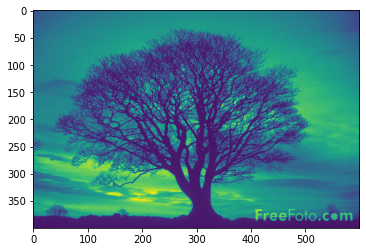

In [ ]:
img = cv2.imread("2ee5J.jpg")
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #cv2.COLOR_BGR2RGB para colorida
plt.imshow(img_cvt)
plt.show()

In [ ]:
#Salvando a imagem
cv2.imwrite("img_cvt.jpg", img_cvt)

True

2 - Normalizar a imagem (histograma / min-max).

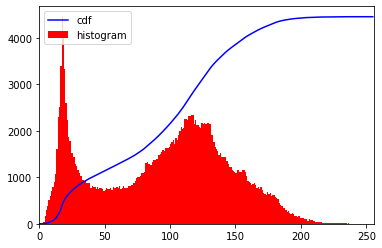

In [ ]:
#Normalized Data
#normalized = (x-min(x))/(max(x)-min(x))
#Normalizar seus dados entre 0 e 1.

hist,bins = np.histogram(img_cvt.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

#normalized_input = (img_cvt - np.amin(img_cvt)) / (np.amax(img_cvt) - np.amin(img_cvt))

plt.plot(cdf_normalized, color = 'b')
plt.hist(img_cvt.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


3 - Aplicar pixel a pixel o mapping de halftone (conforme figura em anexo).

In [ ]:
!pip install pillow
!pip install Image
!pip install ImageDraw
!pip install ImageStat

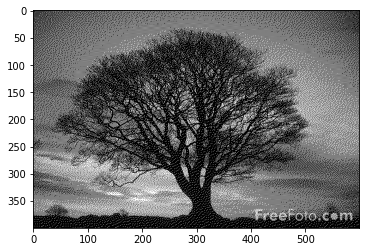

In [ ]:
from PIL import Image

im = Image.open("img_cvt.jpg")

cmyk = im.convert ('CMYK'). split () # RGB contone RGB para CMYK contone
c = cmyk [0] .convert ('1'). convert ('L') # e então meio-tom ('1') cada plano
m = cmyk [1] .convert ('1'). convert ('L') # ... e de volta ao modo ('L')
y = cmyk [2] .convert ('1'). convert ('L')
k = cmyk [3] .convert ('1'). convert ('L')

new_cmyk = Image.merge ('CMYK', [c, m, y, k]) # reúna todos os 9 planos

plt.imshow(new_cmyk)
plt.show()

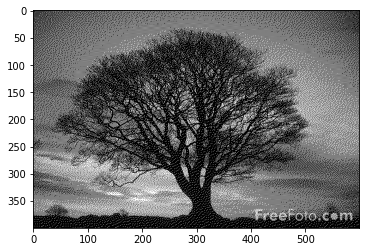

In [ ]:

cmyk = new_cmyk.convert ('CMYK'). split () # RGB contone RGB para CMYK contone
c = cmyk [0] .convert ('1'). convert ('L') # e então meio-tom ('1') cada plano
m = cmyk [1] .convert ('1'). convert ('L') # ... e de volta ao modo ('L')
y = cmyk [2] .convert ('1'). convert ('L')
k = cmyk [3] .convert ('1'). convert ('L')

new_cmyk1 = Image.merge ('CMYK', [c, m, y, k]) # reúna todos os 9 planos

plt.imshow(new_cmyk1)
plt.show()

4) Salvar a imagem e verificar a qualidade

In [ ]:
#Salvando a imagem
new_cmyk1.save('tree-cmyk1.jpg')

5) Compare os resultados obtidos utilizando a imagem original e sua versão com normalização

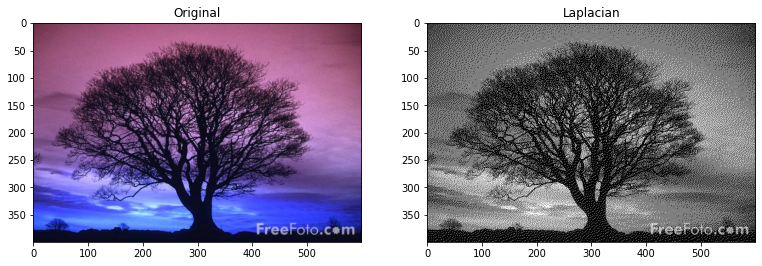

In [ ]:
#Original Image Vs Normalizada
img_orig = cv2.imread("2ee5J.jpg")
img_norm = cv2.imread("tree-cmyk1.jpg")

plt.figure(figsize=(20,20))
plt.subplot(231);plt.title('Original');plt.imshow(img_orig)
plt.subplot(232);plt.title('Laplacian');plt.imshow(img_norm)